# Import Library

In [206]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Import Dataset

In [207]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [208]:
len(X_train)

60000

In [209]:
X_train[0].shape    #Each sample is 28X28 size image.

(28, 28)

In [210]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

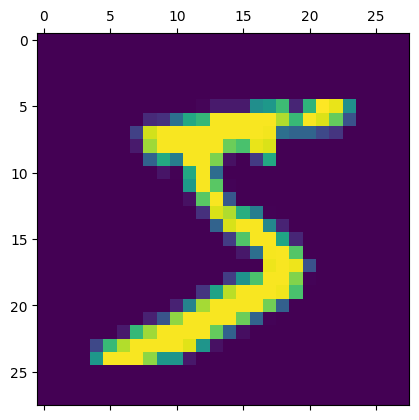

In [211]:
plt.matshow(X_train[0]) # The array we have is what has the value as below.

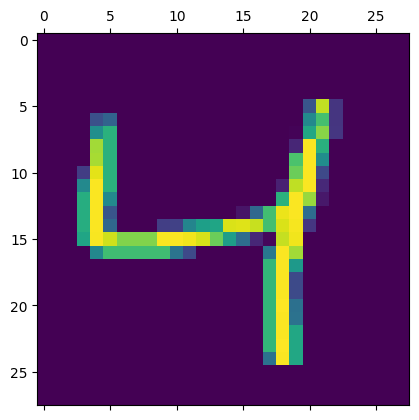

In [212]:
plt.matshow(X_train[2])

In [213]:
y_train[2]

4

# Scale Dataset

In [214]:
X_train=X_train/255 # Scaling is important to scale it between 0 to 1 else the model will give high priority to value like 255 (Like Fair play to every player)
X_test=X_test/255

# Flatten into single dimension array

In [215]:
X_train_flattend=X_train.reshape(len(X_train),28*28)
X_test_flattend=X_test.reshape(len(X_test),28*28)

In [216]:
X_train.shape

(60000, 28, 28)

In [217]:
X_train_flattend.shape  #we are getting 784 because the 2D array of size 28*28 is not flattened down to single dimesnion array having size 784.

(60000, 784)

In [218]:
X_train_flattend[0] #1D array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Create Neural Network

In [219]:
#Input layer=784 elements
#output layer=10 layers

In [220]:
model=keras.Sequential([        #Sequential-> Stack of layers in Neural Network
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')  #10->output layer , 784->Input layer
])

model.compile(
    optimizer='adam',   #Train efficiently in back propagation.
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4675 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9253


In [221]:
model.evaluate(X_test_flattend,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2677 - accuracy: 0.9248


[0.2677081525325775, 0.9247999787330627]

# Testing

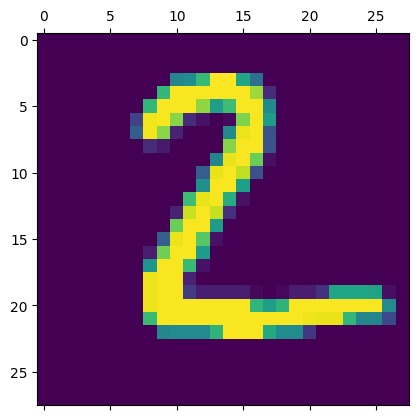

In [222]:
plt.matshow(X_test[1])

In [223]:

# plt.matshow(X_test[1])
y_pred=model.predict(X_test_flattend)
np.argmax(y_pred[1])    #argmax function will give the maximum value out of the whole array and PRINT THE INDEX TO THAT RESPECTIVE VALUE, which is our answer

313/313 [==============================] - 0s 1ms/step


2

In [224]:
type(X_test_flattend[0])

numpy.ndarray

In [225]:
# y_pred[0]   #will have 10 values as giving prediction on all 10 digits

# Check Accuracy

In [226]:
y_predicted=model.predict(X_test_flattend)
y_predicted_labels=[np.argmax(i) for i in y_predicted]  # applying argmax function in every ith value of y_predicted

313/313 [==============================] - 0s 878us/step


In [227]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [228]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    5,   11,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,   11,  913,   15,    8,    5,   13,   11,   43,    5],
       [   4,    1,   16,  910,    1,   33,    4,   10,   23,    8],
       [   1,    1,    3,    1,  923,    0,   11,    4,   11,   27],
       [  10,    3,    2,   21,   10,  789,   16,    7,   27,    7],
       [   9,    3,    3,    1,    7,   13,  919,    2,    1,    0],
       [   1,    5,   21,    6,    9,    1,    0,  946,    3,   36],
       [   8,   10,    5,   18,    9,   31,    9,   10,  867,    7],
       [  11,    7,    1,   10,   32,    9,    0,   24,    6,  909]])>

# For better visualization

Text(95.72222222222221, 0.5, 'Truth')

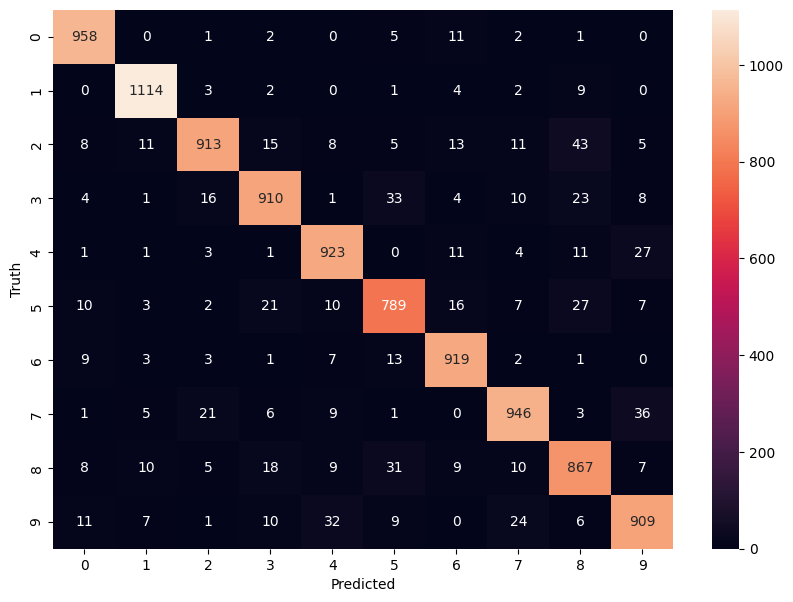

In [229]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#In diagonal then predicted correctly

# Adding hidden layers to improve accuracy

In [230]:
model=keras.Sequential([        #Sequential-> Stack of layers in Neural Network
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),  #10->output layer , 784->Input layer , for hidden layers we use relu activation function
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',   #Train efficiently in back propagation.
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattend,y_train,epochs=5)    # See how accuracy got improved

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2763 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1258 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0643 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9838


In [231]:
model.evaluate(X_test_flattend,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0770 - accuracy: 0.9768


[0.07698329538106918, 0.9768000245094299]

# Save Model

In [232]:
model.save('model.h5')


# Avoid making flatten array 

In [233]:
model=keras.Sequential([        #Sequential-> Stack of layers in Neural Network
    keras.layers.Flatten(input_shape=(28,28)),  #Flattening through Keras
    keras.layers.Dense(100,activation='relu'),  #10->output layer , 784->Input layer , for hidden layers we use relu activation function
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',   #Train efficiently in back propagation.
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


model.fit(X_train,y_train,epochs=5)    # See how accuracy got improved

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1299 - accuracy: 0.9613
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0899 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 0.9826


# Testing for different Numbers

313/313 [==============================] - 0s 1ms/step
Prediction : 6


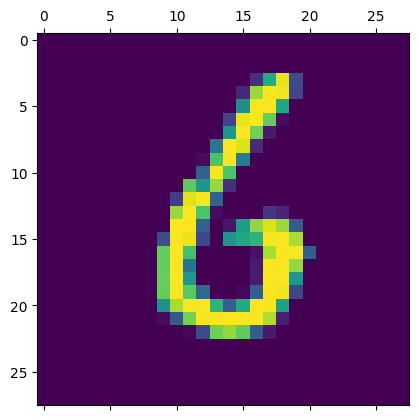

In [234]:

from tensorflow.keras.models import load_model

myModel=load_model('model.h5')

num=50
plt.matshow(X_test[num])
z_pred=myModel.predict(X_test_flattend)


In [235]:
print("Prediction :", np.argmax(z_pred[num]) )

Prediction : 6
